In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [42]:
df_data_analyst = df[df['job_title_short'] == 'Data Analyst'].copy()

In [109]:
df_data_analyst['job_posted_month'] = df_data_analyst['job_posted_date'].dt.month_name()
df_data_analyst['job_posted_month_no'] = df_data_analyst['job_posted_date'].dt.month

In [105]:
df_data_analyst

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1,January
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12,December
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10,October
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},10,October
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},2,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1,January
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",1,January
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3,March
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}",3,March


In [110]:
df_explode = df_data_analyst.explode('job_skills')

In [111]:
df_pivot = df_explode.pivot_table(index= ['job_posted_month_no','job_posted_month'],columns='job_skills',aggfunc='size').sort_index().droplevel(0)

In [112]:
df_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,197.0,17.0,551.0,63.0,2.0,20.0,2.0,1.0,29.0,34.0,...,17.0,228.0,6.0,1778.0,NaN,11.0,6.0,NaN,9.0,95.0
February,169.0,2.0,448.0,49.0,NaN,14.0,1.0,4.0,27.0,13.0,...,9.0,202.0,6.0,1235.0,4.0,2.0,5.0,NaN,4.0,41.0
March,181.0,4.0,442.0,34.0,NaN,23.0,6.0,1.0,17.0,13.0,...,8.0,194.0,8.0,1203.0,1.0,1.0,3.0,1.0,5.0,45.0
April,155.0,4.0,413.0,22.0,NaN,11.0,8.0,9.0,9.0,15.0,...,9.0,185.0,14.0,1177.0,8.0,2.0,1.0,NaN,6.0,26.0
May,128.0,8.0,310.0,30.0,NaN,19.0,9.0,2.0,8.0,21.0,...,11.0,122.0,3.0,957.0,3.0,4.0,NaN,NaN,7.0,18.0
June,164.0,14.0,393.0,29.0,NaN,14.0,9.0,4.0,16.0,16.0,...,8.0,157.0,14.0,1237.0,6.0,6.0,NaN,NaN,11.0,34.0
July,207.0,4.0,366.0,15.0,NaN,8.0,5.0,8.0,19.0,12.0,...,5.0,161.0,11.0,1069.0,NaN,3.0,NaN,NaN,6.0,38.0
August,197.0,3.0,413.0,21.0,NaN,12.0,10.0,3.0,13.0,12.0,...,9.0,184.0,11.0,1298.0,NaN,1.0,NaN,NaN,11.0,41.0
September,118.0,4.0,317.0,21.0,NaN,14.0,3.0,10.0,12.0,10.0,...,4.0,150.0,8.0,945.0,NaN,1.0,NaN,NaN,5.0,25.0


In [113]:
df_pivot.loc['Total'] = df_pivot.sum()

In [114]:
df_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,197.0,17.0,551.0,63.0,2.0,20.0,2.0,1.0,29.0,34.0,...,17.0,228.0,6.0,1778.0,NaN,11.0,6.0,NaN,9.0,95.0
February,169.0,2.0,448.0,49.0,NaN,14.0,1.0,4.0,27.0,13.0,...,9.0,202.0,6.0,1235.0,4.0,2.0,5.0,NaN,4.0,41.0
March,181.0,4.0,442.0,34.0,NaN,23.0,6.0,1.0,17.0,13.0,...,8.0,194.0,8.0,1203.0,1.0,1.0,3.0,1.0,5.0,45.0
April,155.0,4.0,413.0,22.0,NaN,11.0,8.0,9.0,9.0,15.0,...,9.0,185.0,14.0,1177.0,8.0,2.0,1.0,NaN,6.0,26.0
May,128.0,8.0,310.0,30.0,NaN,19.0,9.0,2.0,8.0,21.0,...,11.0,122.0,3.0,957.0,3.0,4.0,NaN,NaN,7.0,18.0
June,164.0,14.0,393.0,29.0,NaN,14.0,9.0,4.0,16.0,16.0,...,8.0,157.0,14.0,1237.0,6.0,6.0,NaN,NaN,11.0,34.0
July,207.0,4.0,366.0,15.0,NaN,8.0,5.0,8.0,19.0,12.0,...,5.0,161.0,11.0,1069.0,NaN,3.0,NaN,NaN,6.0,38.0
August,197.0,3.0,413.0,21.0,NaN,12.0,10.0,3.0,13.0,12.0,...,9.0,184.0,11.0,1298.0,NaN,1.0,NaN,NaN,11.0,41.0
September,118.0,4.0,317.0,21.0,NaN,14.0,3.0,10.0,12.0,10.0,...,4.0,150.0,8.0,945.0,NaN,1.0,NaN,NaN,5.0,25.0


In [115]:
df_pivot = df_pivot.sort_values(by='Total',axis=1,ascending=False)

In [116]:
df_pivot.drop(labels='Total',inplace=True)

In [118]:
df_plot = df_pivot.iloc[:,:5]


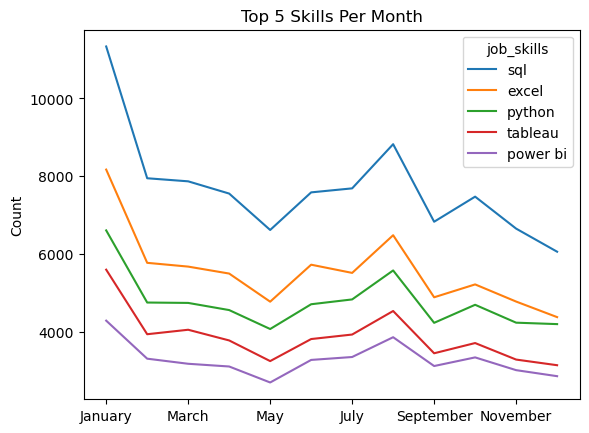

In [120]:
df_plot.plot(kind='line')
plt.title('Top 5 Skills Per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()